# Demo

In [4]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
# red, blue, green, yellow, purple, orange, teal blue, pink, other color
palette=['#ff3b30', '#4cd964','#ffcc00',  '#007aff','#5856d6', '#ff9500', '#5ac8fa', '#ff2d55','#969783']
markers=['o', '^', '<', 'd', '*','2']
sns.set_style("ticks")
# plt.style.use("fivethirtyeight")


mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth']=1
rc("font", **{'family':'serif','serif':['Palatino'], 'size':12})
rc('text', usetex=True)
plt.style.use("seaborn-v0_8-bright")
import os

In [5]:



from odeformer.model import SymbolicTransformerRegressor
from odeformer.metrics import r2_score

dstr = SymbolicTransformerRegressor(
    from_pretrained=True, pretrain_basepath="/home/jiangnan/PycharmProjects/act_ode/baselines/odeformer/")

model_args = {'beam_size': 20,
              'beam_temperature': 0.1}
dstr.set_model_args(model_args, )

Found pretrained model at /home/jiangnan/PycharmProjects/act_ode/baselines/odeformer/model.pt
Loaded pretrained model


In [6]:

import numpy as np

times = np.linspace(0, 10, 50)
x = 2.3 * np.cos(times + .5)
y = 1.2 * np.sin(times + .1)
trajectory = np.stack([x, y], axis=1)

dstr.fit(times, trajectory)
pred_traj = dstr.predict(times, trajectory[0])

dstr.print()
r2_score(trajectory, pred_traj)
pred_traj = dstr.predict(times, trajectory[0])

x_0' = -0.3118 * x_0 + -1.9788 * x_1
x_1' = 0.5561 * x_0 + 0.3268 * x_1


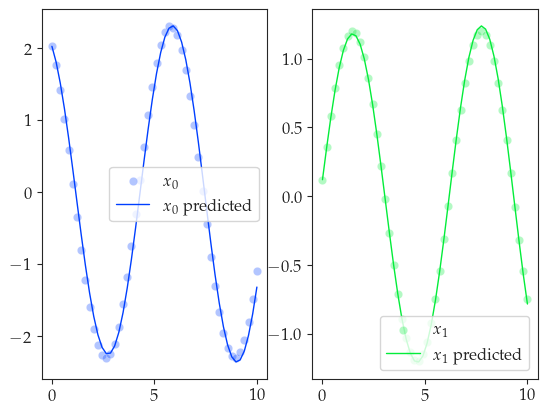

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

dimension = len(trajectory[0])
fig, axs = plt.subplots(ncols=dimension)
for dim in range(dimension):
    sns.scatterplot(x=times, y=trajectory[:, dim], color=f'C{dim}', label=f'$x_{dim}$', marker='o', alpha=.3,
                    ax=axs[dim])
    sns.lineplot(x=times, y=pred_traj[:, dim], color=f'C{dim}', label=f'$x_{dim}$ predicted', ax=axs[dim])
plt.legend(loc='lower right')




<Axes: >

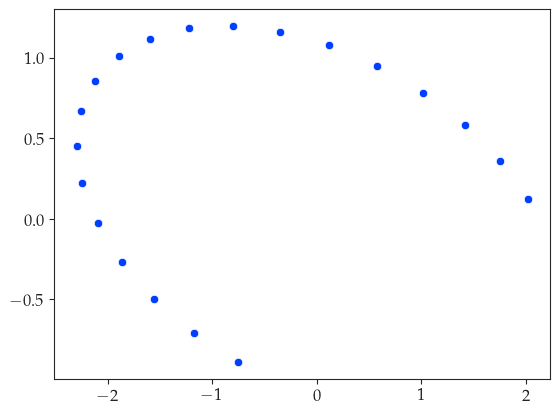

In [8]:
sns.scatterplot(x=trajectory[:20, 0], y=trajectory[:20, 1], marker='o')

In [9]:
from phaseportrait import PhasePortrait2D

eq_idx='vars2_prog15'
def pred_by_odeformer(x_0, x_1):
    return 1.3004 * x_1,  -0.24 * x_1 + -2.8 * x_0

def pred_by_act_ode(x_0, x_1):
    return 0.00049728096303412176*x_0*x_1 + 0.34182666028141486*x_0 + x_1 + 0.008308485714638416,  -4.627633458204109*x_0 - x_1

def ground_truth(x_0, x_1):
    return x_1, -4.5*x_0 - 0.43*x_1

Oscillator1 = PhasePortrait2D(pred_by_odeformer, Range=[-5,5], MeshDim=21)
fig,ax=Oscillator1.plot(color="grey")
fname = os.path.join(eq_idx+"_phase.ode_former.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

Oscillator2 = PhasePortrait2D(pred_by_act_ode, Range=[-5,5], MeshDim=21)
Oscillator2.plot(color='grey')
fname = os.path.join(eq_idx+"_phase.act_ode.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()


Oscillator3 = PhasePortrait2D(ground_truth, Range=[-5,5], MeshDim=21)
Oscillator3.plot(color='bwr')
fname = os.path.join(eq_idx+"_phase.correct.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()


In [28]:

from phaseportrait import PhasePortrait2D
eq_idx='vars2_prog15'
def pred_by_odeformer(x_0, x_1):
    return 0.4218 * (0.1196 + -2.2727 * x_1)**-1 + -0.4608 * x_0, -0.2926 * x_0

def pred_by_act_ode(X0, X1):
    return 46.08651602434018 - 31.1976560151912*X0,    -0.46245415001314544

def ground_truth(x_0, x_1):
    return -1.12333333333333*x_0**3 + 3.37*x_0 + 3.37*x_1, -0.29673590504451*x_0

Oscillator1 = PhasePortrait2D(pred_by_odeformer, Range=[-5,5], MeshDim=21)
fig,ax=Oscillator1.plot(color="grey")
fname = os.path.join(eq_idx+"_phase.ode_former.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

Oscillator2 = PhasePortrait2D(pred_by_act_ode, Range=[-5,5], MeshDim=21)
Oscillator2.plot(color='grey')
fname = os.path.join(eq_idx+"_phase.act_ode.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()


Oscillator3 = PhasePortrait2D(ground_truth, Range=[-5,5], MeshDim=21)
Oscillator3.plot(color='bwr')
fname = os.path.join(eq_idx+"_phase.correct.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 = -0.1430838402326D+12   r2 = -0.1332307405038D+03


In [5]:
from phaseportrait import PhasePortrait2D
import matplotlib.pyplot as plt
import os
eq_idx='vars2_prog27'
def pred_by_odeformer(x_0, x_1):
    return  -0.0557 * x_1, 1.6756 * x_0 + -0.6100 * (0.0179 + -1 * x_1)**2

def pred_by_act_ode(X0, X1):
    return -2.3577877255758987*X0**2 - 6.9562397730511176*X0 + X1,	 1.43111283372772*X0**2

def ground_truth(x_0, x_1):
    x=[x_0, x_1]
    return x[0]**2*x[1] - x[0] + 0.24, -x[0]**2*x[1] + 1.43

Oscillator1 = PhasePortrait2D(pred_by_odeformer, Range=[0.001,5], MeshDim=21)
fig,ax=Oscillator1.plot(color="grey")
fname = os.path.join(eq_idx+"_phase.ode_former.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

Oscillator2 = PhasePortrait2D(pred_by_act_ode, Range=[0.001,5], MeshDim=21)
Oscillator2.plot(color='grey')
fname = os.path.join(eq_idx+"_phase.act_ode.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()


Oscillator3 = PhasePortrait2D(ground_truth, Range=[0.001,5], MeshDim=21)
Oscillator3.plot(color='bwr')
fname = os.path.join(eq_idx+"_phase.correct.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

/home/jiangnan/miniconda3/lib/python3.10/site-packages/phaseportrait/streamlines/streamlines_base.py:137: RuntimeWarning: divide by zero encountered in divide
  deltat = np.min(self.get_delta_coordinates(*coords)/(10*np.max(np.abs(_speed))))


In [4]:
 

from phaseportrait import PhasePortrait2D
import matplotlib.pyplot as plt
import os
import numpy as np
eq_idx='vars2_prog5'
def pred_by_odeformer(x_0, x_1):
    return  0.9846 * x_1, -0.7883 * x_0

def pred_by_act_ode(X0, X1):
    return X1,     -0.8999999857486896*np.sin(X0)

def ground_truth(x_0, x_1):
    x=[x_0, x_1]
    return x[1], -0.9*np.sin(x[0])

Oscillator1 = PhasePortrait2D(pred_by_odeformer, Range=[0.001,5], MeshDim=21, Title="Predicted by ODEFormer", xlabel=r"$x_1$", ylabel=r"$x_2$")
Oscillator1.plot(color="grey")
fname = os.path.join(eq_idx+"_phase.ode_former.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

Oscillator2 = PhasePortrait2D(pred_by_act_ode, Range=[0.001,5], MeshDim=21,Title="Predicted by ACT-ODE", xlabel=r"$x_1$", ylabel=r"$x_2$")
Oscillator2.plot(color='grey')
fname = os.path.join(eq_idx+"_phase.act_ode.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()


Oscillator3 = PhasePortrait2D(ground_truth, Range=[0.001,5], MeshDim=21,Title="Ground-truth", xlabel=r"$x_1$", ylabel=r"$x_2$")
Oscillator3.plot(color='bwr')
fname = os.path.join(eq_idx+"_phase.correct.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)
plt.close()

# ODEBench

Here we reproduce the results of Figure 1.
Since Colab is not equipped with GPU support, we use a rather small batch size to obtain fast inference (10 instead of 50 in the paper), so results are a bit worse.
Feel free to test at beam size 50!

In [2]:
from odeformer.odebench.strogatz_equations import equations
from odeformer.odebench.solve_and_plot import config, process_equations, solve_equations, plot_prediction

indices = [9, 16, 27, 40, 52, 54, 62, 63]
equations = [equations[i - 1] for i in indices]
process_equations(equations)
solve_equations(equations, config)

VALIDATION DONE
PROCESSING DONE


100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

SOLVING DONE


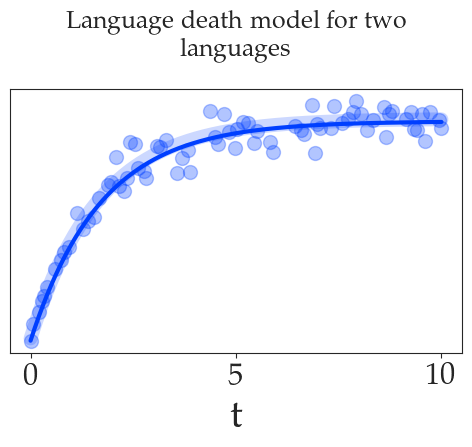

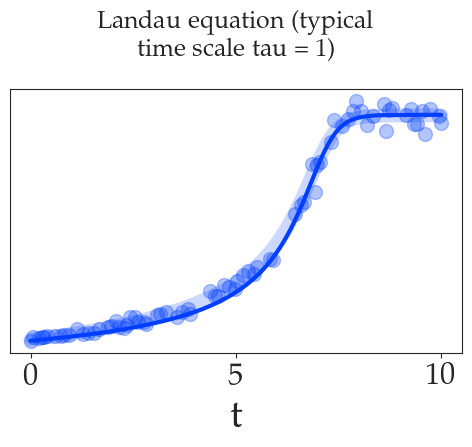

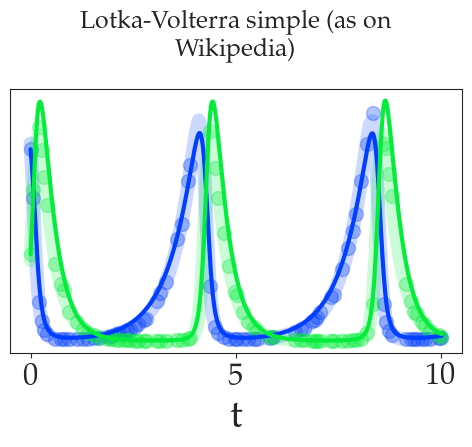

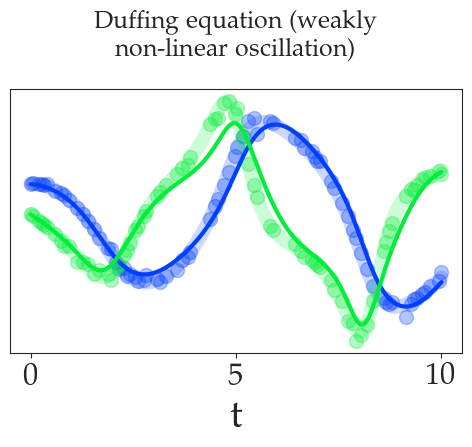

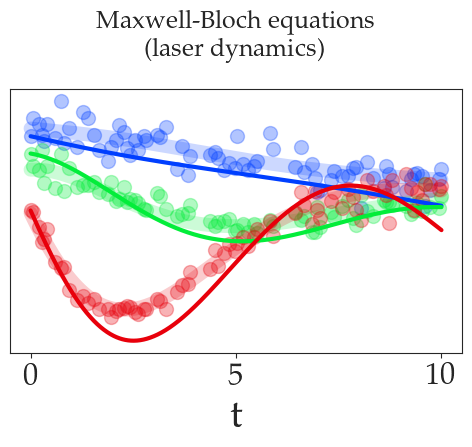

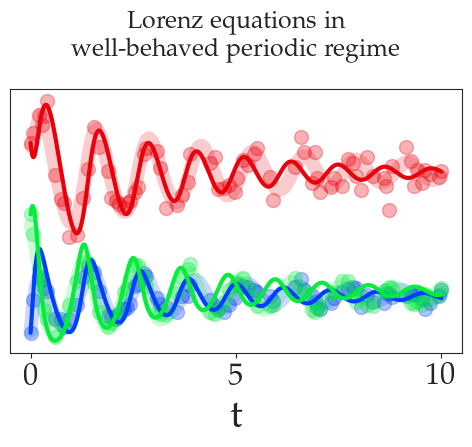

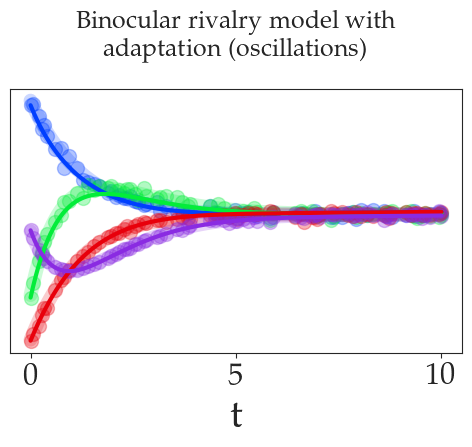

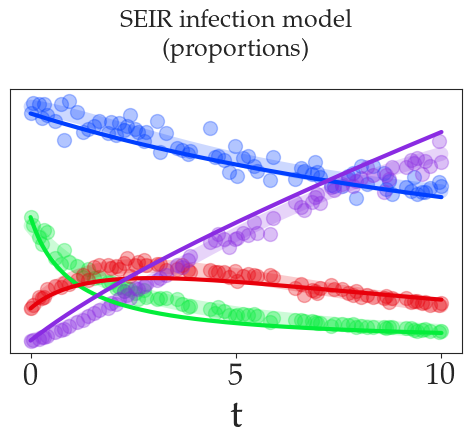

In [10]:
for equation in equations:
    # print(dstr, equation)
    plot_prediction(dstr, equation, seed=0, noise=.05, subsampling=.5)